In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [54]:
data = pd.read_csv('Brackenhillschool.csv', parse_dates= ['created_at'],na_values=[-99.9], index_col=['created_at'])

In [55]:
data.describe()

,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,Unnamed: 9
count,40015.000000,40015.000000,40015.000000,40015.000000,40015.000000,40015.000000,40015.000000,40015.000000,0.0
mean,7.067679,11.230809,12.097367,7881.022849,-70.060215,61.508317,61.532492,10.201592,NaN
std,10.181741,16.693142,17.926546,12641.274263,13.783472,8.701724,13.563486,12.554688,NaN
min,0.000000,0.000000,0.000000,1.000000,-96.000000,25.000000,10.600000,0.000000,NaN
25%,1.440000,2.670000,3.100000,819.000000,-76.400000,55.000000,55.200000,2.670000,NaN
50%,3.650000,5.530000,6.120000,2006.000000,-70.000000,61.000000,65.800000,5.530000,NaN
75%,8.160000,12.170000,12.900000,7333.500000,-62.000000,66.000000,71.400000,12.160000,NaN
max,156.190000,269.160000,297.150000,51044.000000,-17.600000,102.000000,89.750000,178.640000,NaN


In [69]:
#drop unused columns
data.drop(['PM1.0_CF1_ug/m3','UptimeMinutes', 'RSSI_dbm', 'Temperature_F', 'Humidity_%', 'PM2.5_ATM_ug/m3', 'Unnamed: 9' ], axis = 1, inplace=True)

In [70]:
data.describe()

,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3
count,40015.000000,40015.000000
mean,11.230809,12.097367
std,16.693142,17.926546
min,0.000000,0.000000
25%,2.670000,3.100000
50%,5.530000,6.120000
75%,12.170000,12.900000
max,269.160000,297.150000


In [72]:
data_hourly = data.resample('H').mean()
data_hourly.head()

,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3
created_at,,
2020-05-15 10:00:00+00:00,2.580000,2.960000
2020-05-15 11:00:00+00:00,1.610000,1.751667
2020-05-15 12:00:00+00:00,2.268333,2.561667
2020-05-15 13:00:00+00:00,2.781667,3.066667
2020-05-15 14:00:00+00:00,2.501667,2.661667


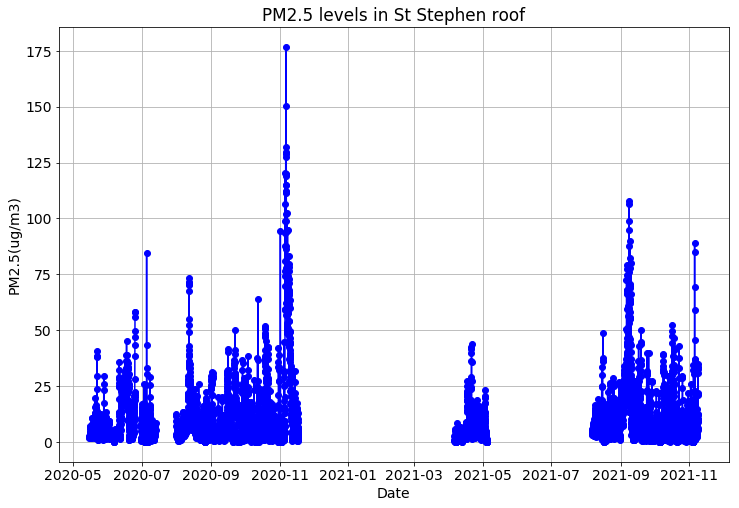

In [74]:
fig,ax = plt.subplots(figsize=(12, 8))
ax.plot(data_hourly.index.values, data_hourly['PM2.5_CF1_ug/m3'].values, '-o', color='blue')

ax.set(xlabel='Date', ylabel='PM2.5(ug/m3)', title='PM2.5 levels in St Stephen roof')

plt.show()

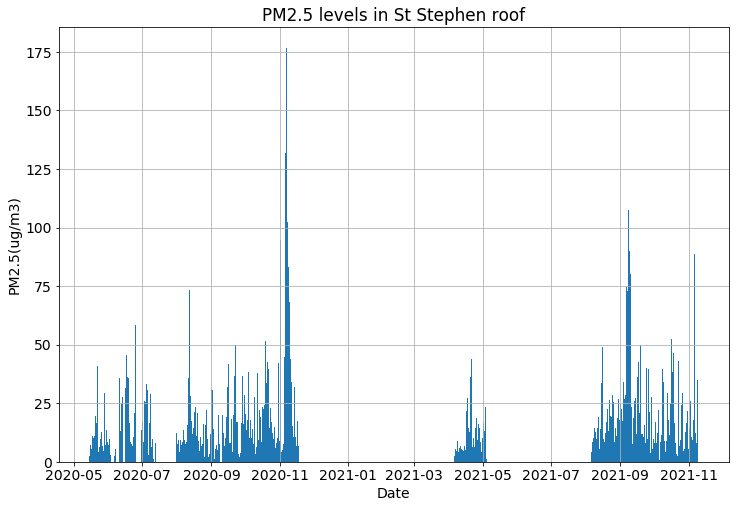

In [79]:
fig,ax = plt.subplots(figsize=(12, 8))
ax.bar(data_hourly.index.values, data_hourly['PM2.5_CF1_ug/m3'].values)

ax.set(xlabel='Date', ylabel='PM2.5(ug/m3)', title='PM2.5 levels in St Stephen roof')

plt.show()

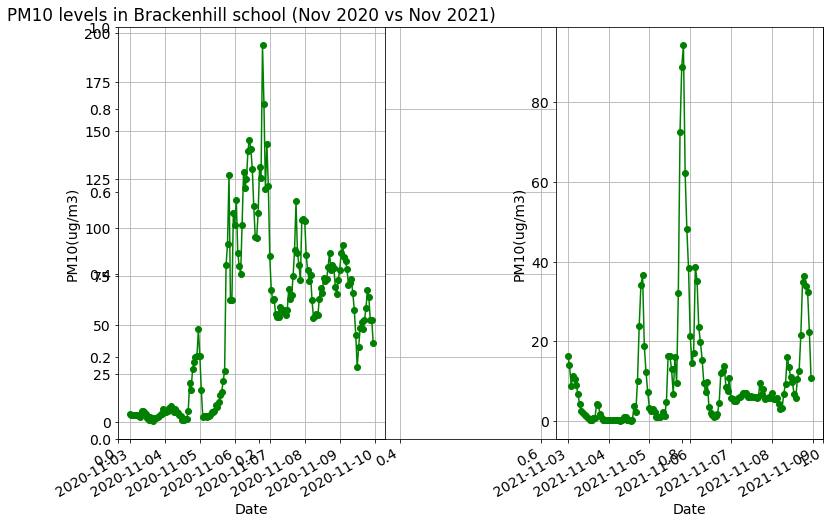

In [87]:
data_Nov2020 = data_hourly['2020-11-03': '2020-11-09']
data_Nov2021 = data_hourly['2021-11-03': '2021-11-09']

fig,ax = plt.subplots(figsize=(12, 8))
axes1 = fig.add_subplot(1, 2, 1)
axes2 = fig.add_subplot(1, 2, 2)

                           
axes1.plot(data_Nov2020.index.values, data_Nov2020['PM10.0_CF1_ug/m3'].values, '-o', color='green')
axes1.set(xlabel='Date', ylabel='PM10(ug/m3)', title='PM10 levels in Brackenhill school (Nov 2020 vs Nov 2021)')

axes2.plot(data_Nov2021.index.values, data_Nov2021['PM10.0_CF1_ug/m3'].values, '-o', color='green')
axes2.set(xlabel='Date', ylabel='PM10(ug/m3)')

plt.gcf().autofmt_xdate()
plt.tight_layout()                           
plt.show()

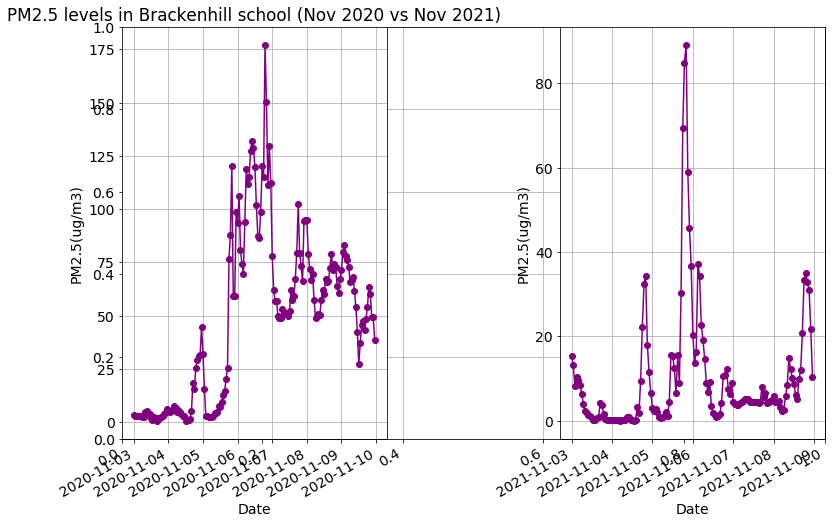

In [88]:
data_Nov2020 = data_hourly['2020-11-03': '2020-11-09']
data_Nov2021 = data_hourly['2021-11-03': '2021-11-09']

fig,ax = plt.subplots(figsize=(12, 8))
axes1 = fig.add_subplot(1, 2, 1)
axes2 = fig.add_subplot(1, 2, 2)

                           
axes1.plot(data_Nov2020.index.values, data_Nov2020['PM2.5_CF1_ug/m3'].values, '-o', color='purple')
axes1.set(xlabel='Date', ylabel='PM2.5(ug/m3)', title='PM2.5 levels in Brackenhill school (Nov 2020 vs Nov 2021)')

axes2.plot(data_Nov2021.index.values, data_Nov2021['PM2.5_CF1_ug/m3'].values, '-o', color='purple')
axes2.set(xlabel='Date', ylabel='PM2.5(ug/m3)')

plt.gcf().autofmt_xdate()
plt.tight_layout()     
plt.savefig
plt.show()